# Load Libraries

In [10]:
library(tidyverse)
library(readr)

In [6]:
list.files("/home/yeachan153/Desktop/BDS/R/Big Data Analytics/Big-Data-Analytics/Sensor Classification Project/Dataset")

[1] "__MACOSX"            "activity_labels.txt" "In Class Demo.ipynb"
[4] "RawData"             "README Raw.txt"

Can show files with list.files()

In [8]:
print(file.show("activity_labels.txt"))

[[1]]
[[1]]$source
[1] "page"

[[1]]$data
[[1]]$data$`text/plain`
[1] "R Information\n\n1 WALKING           \n2 WALKING_UPSTAIRS  \n3 WALKING_DOWNSTAIRS\n4 SITTING           \n5 STANDING          \n6 LAYING            \n7 STAND_TO_SIT      \n8 SIT_TO_STAND      \n9 SIT_TO_LIE        \n10 LIE_TO_SIT        \n11 STAND_TO_LIE      \n12 LIE_TO_STAND      "


[[1]]$metadata
named list()




file.show() will show inside the file.

# Read in data

In [20]:
act_labels = read_delim("activity_labels.txt", delim = " ",
                        col_names = FALSE, trim_ws = TRUE)
act_labels = 
    act_labels %>%
    select(X1, X2)

Parsed with column specification:
cols(
  X1 = col_integer(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character()
)
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“10 parsing failures.
row # A tibble: 5 x 5 col     row col   expected   actual     file                  expected   <int> <chr> <chr>      <chr>      <chr>                 actual 1     2 <NA>  13 columns 4 columns  'activity_labels.txt' file 2     3 <NA>  13 columns 2 columns  'activity_labels.txt' row 3     5 <NA>  13 columns 12 columns 'activity_labels.txt' col 4     6 <NA>  13 columns 14 columns 'activity_labels.txt' expected 5     7 <NA>  13 columns 8 columns  'activity_labels.txt'
... ...........

In [22]:
act_labels

X1,X2
1,WALKING
2,WALKING_UPSTAIRS
3,WALKING_DOWNSTAIRS
4,SITTING
5,STANDING
6,LAYING
7,STAND_TO_SIT
8,SIT_TO_STAND
9,SIT_TO_LIE
10,LIE_TO_SIT


In [33]:
labels = read_delim("RawData/Train/labels_train.txt", delim = " ", col_names = F)
colnames(labels) = c("trial", "userid", "activity", "start", "end")

Parsed with column specification:
cols(
  X1 = col_integer(),
  X2 = col_integer(),
  X3 = col_integer(),
  X4 = col_integer(),
  X5 = col_integer()
)


In [35]:
head(labels)

trial,userid,activity,start,end
1,1,5,250,1232
1,1,7,1233,1392
1,1,4,1393,2194
1,1,8,2195,2359
1,1,5,2360,3374
1,1,11,3375,3662


# Join with activity labels

In [36]:
labels =
    labels %>%
    mutate(activity = act_labels$X2[activity])

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”

In [38]:
head(labels)

trial,userid,activity,start,end
1,1,STANDING,250,1232
1,1,STAND_TO_SIT,1233,1392
1,1,SITTING,1393,2194
1,1,SIT_TO_STAND,2195,2359
1,1,STANDING,2360,3374
1,1,STAND_TO_LIE,3375,3662


Now activity is labelled.

In [54]:
filename = "RawData/Train/acc_exp01_user01.txt"
username = gsub(".+user(\\d+).+", "\\1", filename)
expname = gsub(".+exp(\\d+).+", "\\1", filename)

user01 = read_delim(filename, " ", col_names = FALSE)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double()
)


In [40]:
head(user01)

X1,X2,X3
0.9180556,-0.11250000,0.5097223
0.9111111,-0.09305556,0.5375000
0.8819445,-0.08611111,0.5138889
0.8819445,-0.08611111,0.5138889
0.8791667,-0.10000000,0.5055556
0.8888890,-0.10555556,0.5125000


In [44]:
username

[1] "01"

gsub() used to extract username.

# Graphing time series

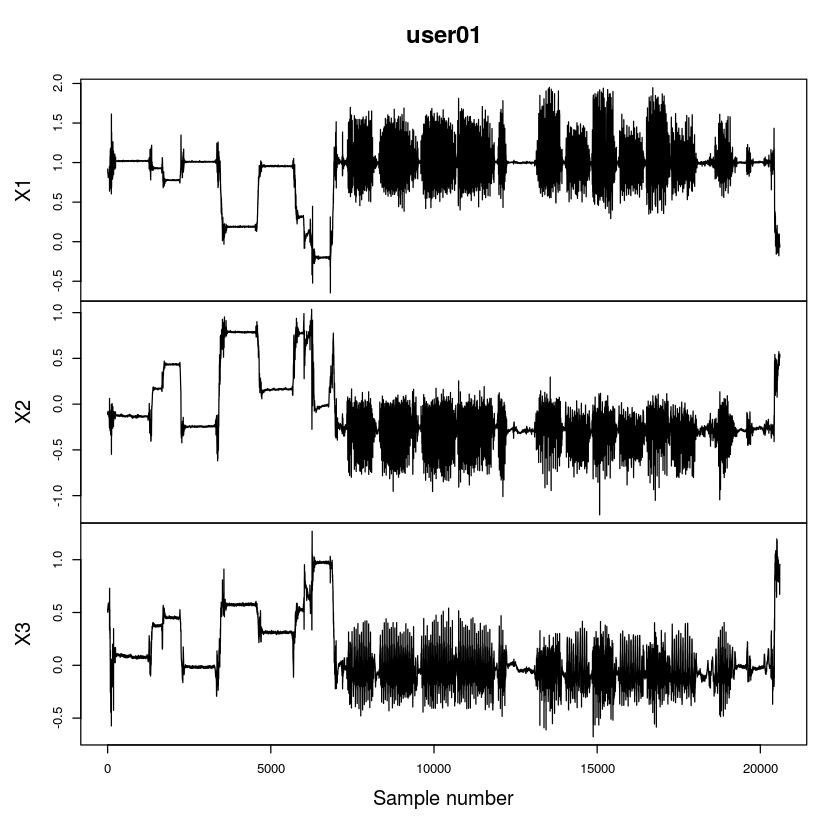

In [49]:
plot.ts(user01, xlab = "Sample number")

In [50]:
labels[1:2,]

trial,userid,activity,start,end
1,1,STANDING,250,1232
1,1,STAND_TO_SIT,1233,1392


# Labelling users

In [51]:
findInterval(.4, vec = c(.25, .5, .75))

[1] 1

The first number in the vector is the lower limit, the last is the 2nd to last limit.

In [65]:
user_labels = 
    labels %>%
    filter(userid == as.numeric(username) &
           trial == as.numeric(expname)) %>%
    mutate(segment = row_number()) %>%
    gather(start_end, vec, -trial, - userid, -activity, -segment) %>%
    arrange(vec) %>%
    mutate(activity = ifelse(start_end == "end", NA, activity),
           activity_id = row_number())

In [66]:
head(user_labels)

trial,userid,activity,segment,start_end,vec,activity_id
1,1,STANDING,1,start,250,1
1,1,NA,1,end,1232,2
1,1,STAND_TO_SIT,2,start,1233,3
1,1,NA,2,end,1392,4
1,1,SITTING,3,start,1393,5
1,1,NA,3,end,2194,6


In [76]:
user = 
    user01 %>%
    mutate(sample = row_number() - 1) %>%
    mutate(activity_id = findInterval(sample, user_labels$vec)) %>%
    left_join(user_labels)

Joining, by = "activity_id"


In [77]:
head(user)

X1,X2,X3,sample,activity_id,trial,userid,activity,segment,start_end,vec
0.9180556,-0.11250000,0.5097223,0,0,NA,NA,NA,NA,NA,NA
0.9111111,-0.09305556,0.5375000,1,0,NA,NA,NA,NA,NA,NA
0.8819445,-0.08611111,0.5138889,2,0,NA,NA,NA,NA,NA,NA
0.8819445,-0.08611111,0.5138889,3,0,NA,NA,NA,NA,NA,NA
0.8791667,-0.10000000,0.5055556,4,0,NA,NA,NA,NA,NA,NA
0.8888890,-0.10555556,0.5125000,5,0,NA,NA,NA,NA,NA,NA


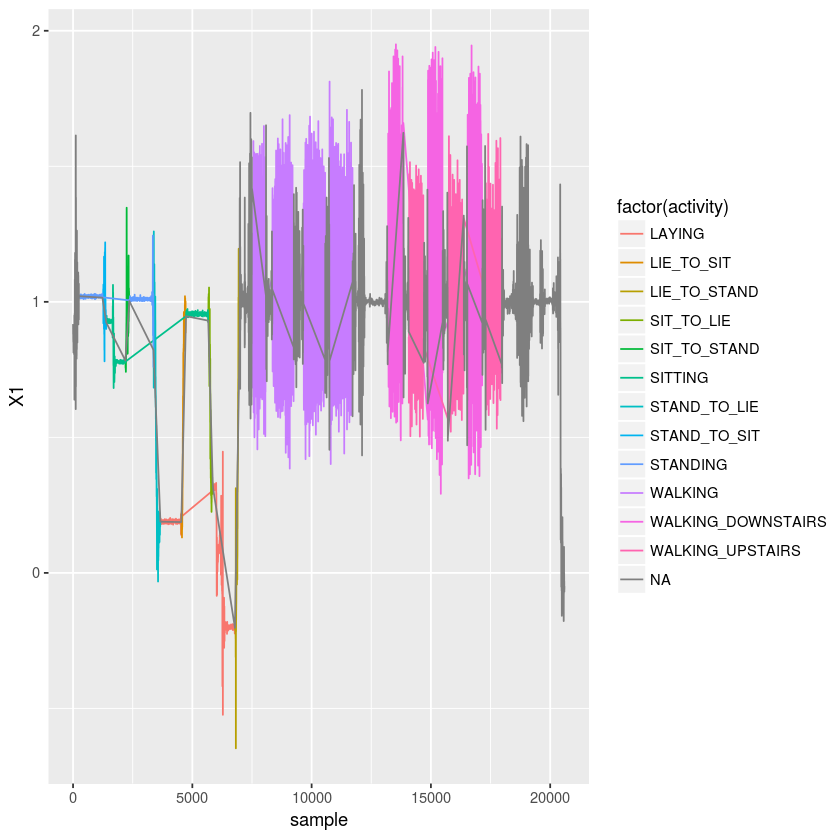

In [80]:
user %>%
    ggplot(aes(sample, X1, col = factor(activity)), group = segment) +
    geom_line()

# Feature engineering

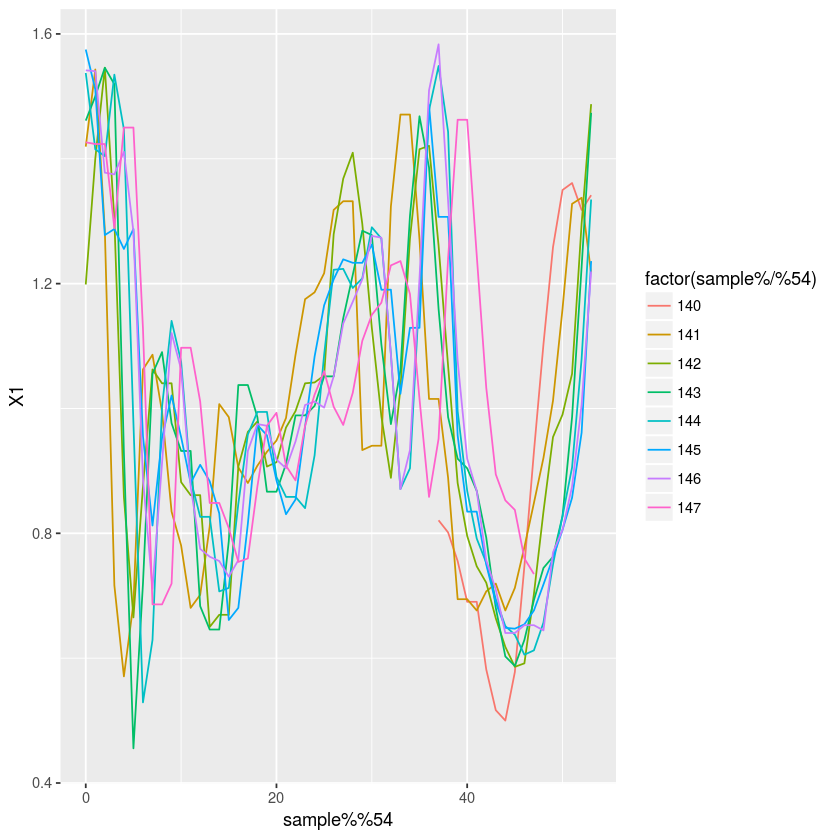

In [87]:
user %>% 
  dplyr::filter(activity == "WALKING", segment == 13, 7596 < sample, sample < 7986) %>% # change 7986 to 8586 to see shifted walk cycle
  ggplot(aes(sample %% 54, X1, group = sample %/% 54, col = factor(sample %/% 54))) + geom_line()